# Import Required Libraries
Import necessary libraries such as numpy, matplotlib, and the custom testers.

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Import custom testers
from collision_tester import collision_tester, test_collision_tester
from identity_tester import identity_tester, test_identity_tester
from goldreich_reduction import goldreich_reduction, algorithm_8, epsilon_tester_uniformity

# Generate Test Distributions
Generate various test distributions including far exact, bimodal, normal, and exponential distributions.

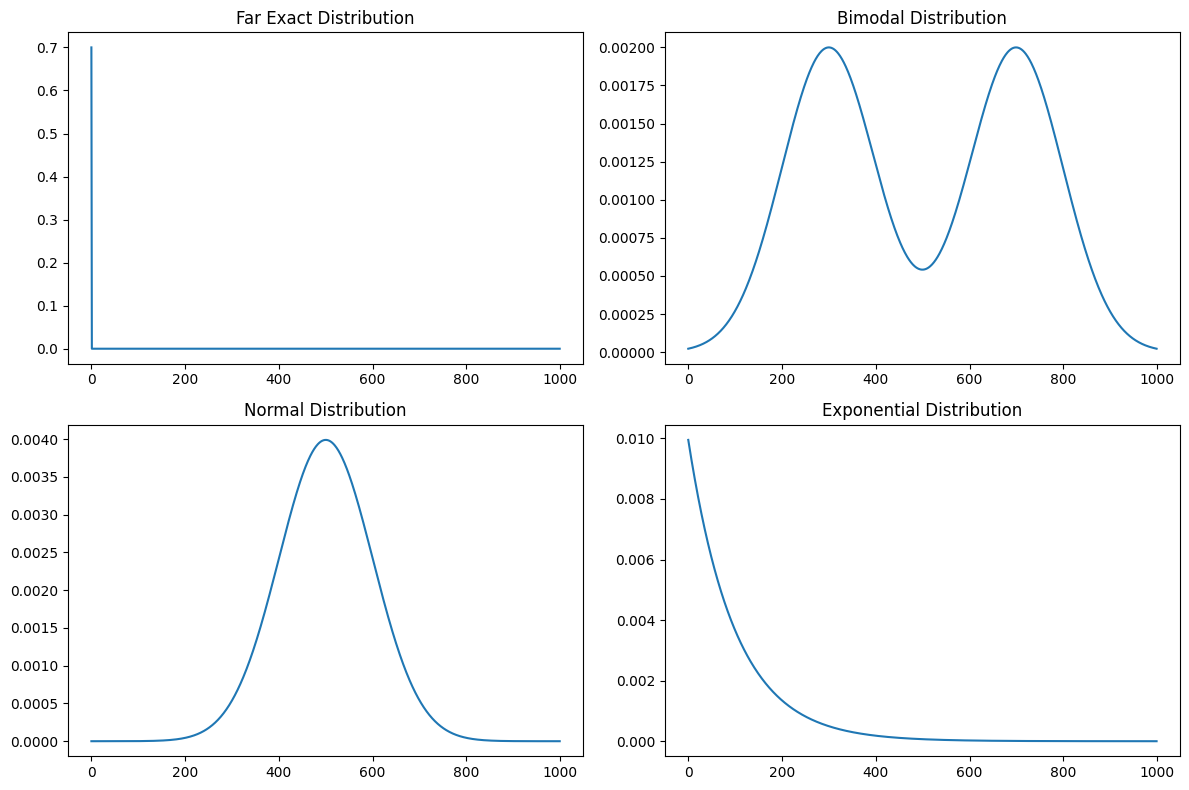

In [6]:
from generate_test_distributions import generate_far_exact_distribution, generate_bimodal_distribution, generate_normal_distribution, generate_exponential_distribution

# Example usage
size = 1000
far_exact_distribution = generate_far_exact_distribution(size)
bimodal_distribution = generate_bimodal_distribution(size)
normal_distribution = generate_normal_distribution(size)
exponential_distribution = generate_exponential_distribution(size)

# Plot the distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Far Exact Distribution")
plt.plot(far_exact_distribution)

plt.subplot(2, 2, 2)
plt.title("Bimodal Distribution")
plt.plot(bimodal_distribution)

plt.subplot(2, 2, 3)
plt.title("Normal Distribution")
plt.plot(normal_distribution)

plt.subplot(2, 2, 4)
plt.title("Exponential Distribution")
plt.plot(exponential_distribution)

plt.tight_layout()
plt.show()

# Define Testers
Define the identity, collision, and goldreich reduction testers.

# Identity Tester

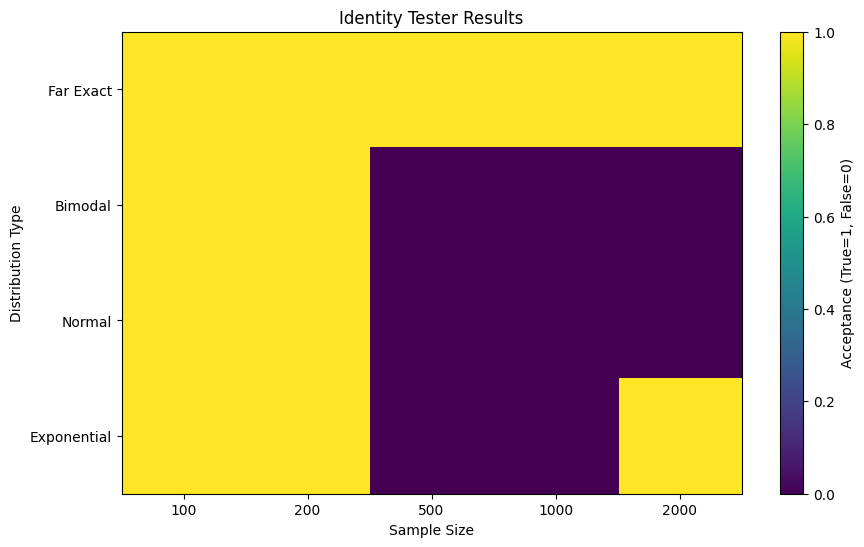

In [7]:
n = 10
far_exact_dist = generate_far_exact_distribution(n)
bimodal_dist = generate_bimodal_distribution(n)
normal_dist = generate_normal_distribution(n)
exponential_dist = generate_exponential_distribution(n)

# Convert distributions to dictionaries
distributions = {
    'Far Exact': {i: far_exact_dist[i] for i in range(n)},
    'Bimodal': {i: bimodal_dist[i] for i in range(n)},
    'Normal': {i: normal_dist[i] for i in range(n)},
    'Exponential': {i: exponential_dist[i] for i in range(n)}
}
epsilon = 0.1
sample_sizes = [100, 200, 500, 1000, 2000]

# Initialize results matrix
results_matrix = np.zeros((len(distributions), len(sample_sizes)), dtype=bool)

for dist_idx, (name, q) in enumerate(distributions.items()):
    for size_idx, num_samples in enumerate(sample_sizes):
        #print(f"Testing distribution: {name} with {num_samples} samples")
        result = test_identity_tester(q, num_samples, epsilon, name)
        results_matrix[dist_idx, size_idx] = result

# Print results matrix
#print("\nResults Matrix (True = Accepted, False = Rejected):")
#print("Sample Sizes:", sample_sizes)
#for dist_idx, name in enumerate(distributions.keys()):
    #print(f"{name}: {results_matrix[dist_idx]}")

# Visualize the results matrix
# os.makedirs("results/identity_tester", exist_ok=True)
plt.figure(figsize=(10, 6))
plt.imshow(results_matrix, aspect='auto')
plt.colorbar(label='Acceptance (True=1, False=0)')
plt.xticks(ticks=np.arange(len(sample_sizes)), labels=sample_sizes)
plt.yticks(ticks=np.arange(len(distributions)), labels=distributions.keys())
plt.xlabel('Sample Size')
plt.ylabel('Distribution Type')
plt.title('Identity Tester Results')
# plt.savefig("results/identity_tester/identity_tester_results_matrix.png")
plt.show()
plt.close()

# Collision Tester

Far Exact: [ True  True  True  True  True]
Bimodal: [ True  True  True  True  True]
Normal: [ True  True  True  True  True]
Exponential: [ True  True  True  True  True]


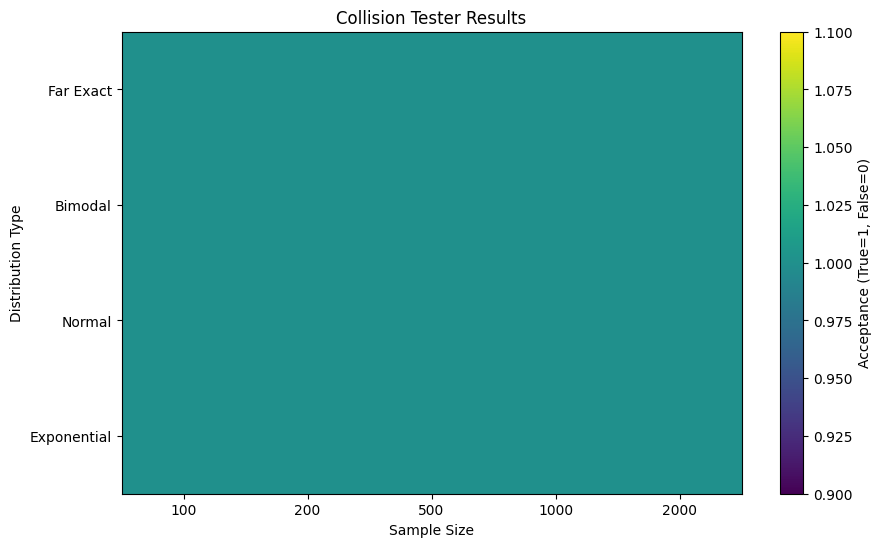

In [8]:
# Test the collision tester
n = 30
far_exact_dist = generate_far_exact_distribution(n)
bimodal_dist = generate_bimodal_distribution(n)
normal_dist = generate_normal_distribution(n)
exponential_dist = generate_exponential_distribution(n)

# Normalize the distributions to sum to 1
far_exact_dist /= np.sum(far_exact_dist)
bimodal_dist /= np.sum(bimodal_dist)
normal_dist /= np.sum(normal_dist)
exponential_dist /= np.sum(exponential_dist)

distributions = {
    'Far Exact': far_exact_dist,
    'Bimodal': bimodal_dist,
    'Normal': normal_dist,
    'Exponential': exponential_dist
}
epsilon = 0.1
sample_sizes = [100, 200, 500, 1000, 2000]

# Initialize results matrix
results_matrix = np.zeros((len(distributions), len(sample_sizes)), dtype=bool)

for dist_idx, (name, p) in enumerate(distributions.items()):
    for size_idx, num_samples in enumerate(sample_sizes):
        #print(f"Testing distribution: {name} with {num_samples} samples")
        result = test_collision_tester(p, num_samples, epsilon, name)
        results_matrix[dist_idx, size_idx] = result

# Print results matrix
#print("\nResults Matrix (True = Accepted, False = Rejected):")
#print("Sample Sizes:", sample_sizes)
for dist_idx, name in enumerate(distributions.keys()):
    print(f"{name}: {results_matrix[dist_idx]}")

# Visualize the results matrix
plt.figure(figsize=(10, 6))
plt.imshow(results_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Acceptance (True=1, False=0)')
plt.xticks(ticks=np.arange(len(sample_sizes)), labels=sample_sizes)
plt.yticks(ticks=np.arange(len(distributions)), labels=distributions.keys())
plt.xlabel('Sample Size')
plt.ylabel('Distribution Type')
plt.title('Collision Tester Results')
#plt.savefig("results/collision_tester/collision_tester_results_matrix.png")
plt.show()
plt.close()

# Goldreich Reduction


Testing distribution: Far Exact
Computed chi-square statistic: 3845.5624999999604
Decision threshold: 2787.4701131007328
Reduction tester result for Far Exact: Rejected


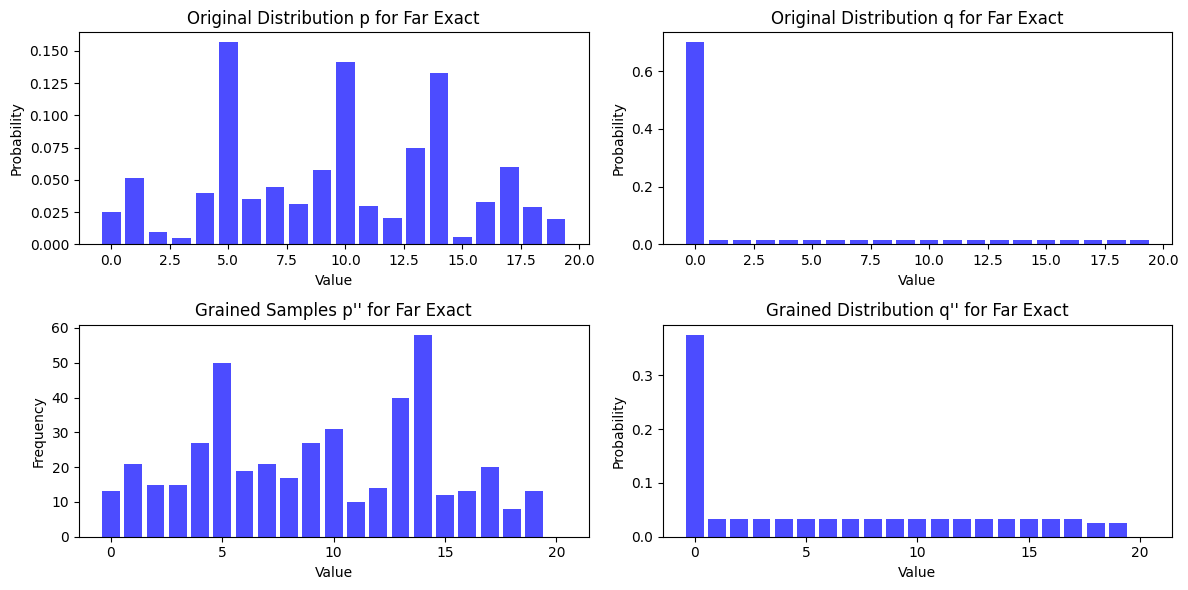


Testing distribution: Bimodal
Computed chi-square statistic: 2727.071428571382
Decision threshold: 2787.4701131007328
Reduction tester result for Bimodal: Accepted


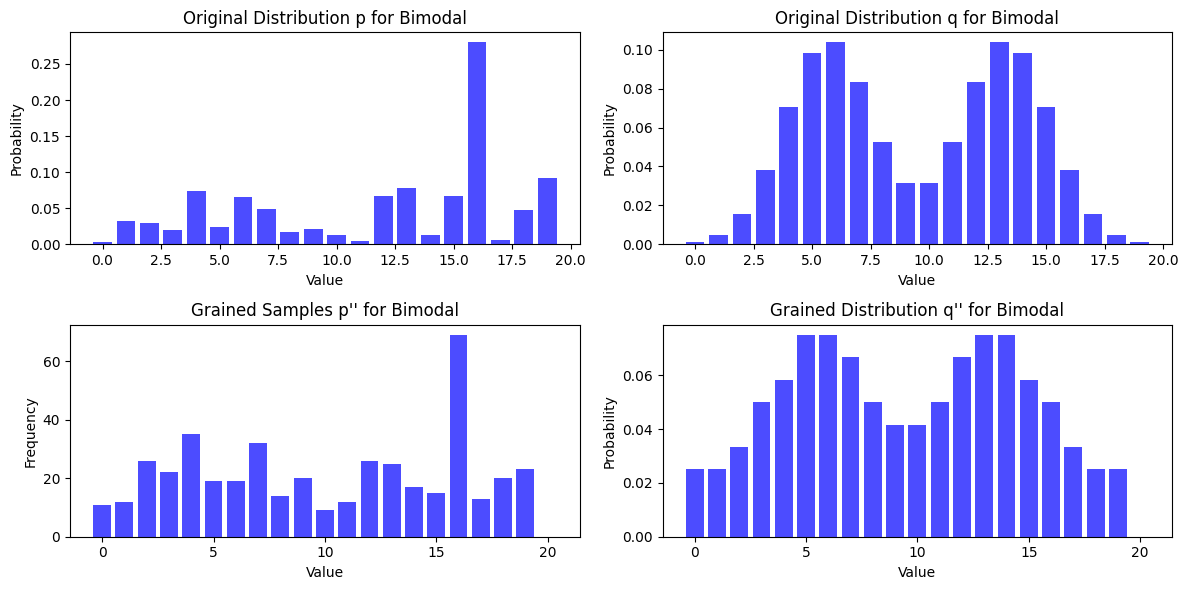


Testing distribution: Normal
Computed chi-square statistic: 2943.5535714285425
Decision threshold: 2787.4701131007328
Reduction tester result for Normal: Rejected


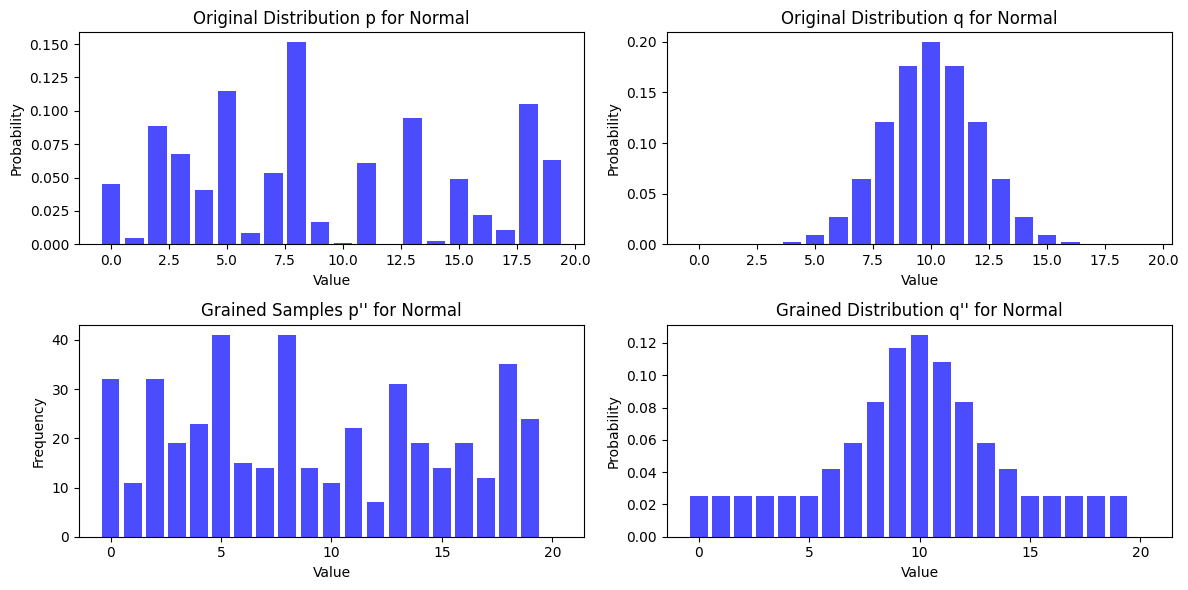


Testing distribution: Exponential
Computed chi-square statistic: 3220.1696428570867
Decision threshold: 2787.4701131007328
Reduction tester result for Exponential: Rejected


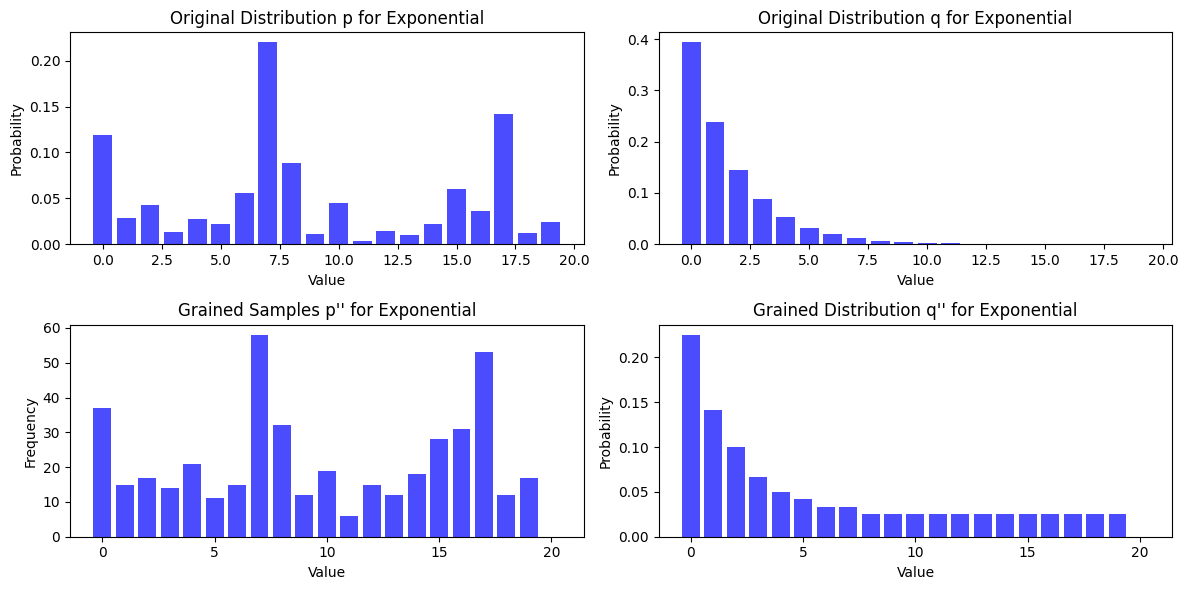

In [10]:
n = 20
epsilon = 0.1

# Create results directory if it doesn't exist
results_dir = "results/goldreich_reduction"
#os.makedirs(results_dir, exist_ok=True)

# Generate different types of distributions
distributions = {
    'Far Exact': generate_far_exact_distribution(n),
    'Bimodal': generate_bimodal_distribution(n),
    'Normal': generate_normal_distribution(n),
    'Exponential': generate_exponential_distribution(n)
}

for name, q in distributions.items():
    print(f"\nTesting distribution: {name}")
    
    # Generate a random distribution p
    p = np.random.dirichlet(np.ones(n), size=1)[0]

    # Generate samples from p
    s = int(np.ceil(np.sqrt(n) / epsilon**2))
    p_samples = np.random.choice(range(n), size=s, p=p)

    # Get the grained Distributions
    q_grained, p_grained_samples = algorithm_8(p, q, epsilon)
    
    # Test the Goldreich reduction
    mapped_samples, m = goldreich_reduction(q, p_samples, epsilon)
    result = epsilon_tester_uniformity(mapped_samples, m, epsilon)

    print(f"Reduction tester result for {name}: {'Accepted' if result else 'Rejected'}")

    # Plot the distributions and samples
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.bar(range(n), p, color='blue', alpha=0.7)
    plt.title(f"Original Distribution p for {name}")
    plt.xlabel("Value")
    plt.ylabel("Probability")

    plt.subplot(2, 2, 2)
    plt.bar(range(n), q, color='blue', alpha=0.7)
    plt.title(f"Original Distribution q for {name}")
    plt.xlabel("Value")
    plt.ylabel("Probability")

    plt.subplot(2, 2, 3)
    plt.bar(range(n + 1), [p_grained_samples.count(i) for i in range(n + 1)], color='blue', alpha=0.7)
    plt.title(f"Grained Samples p'' for {name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 4)
    plt.bar(range(n + 1), [q_grained.get(str(i), 0.0) for i in range(n + 1)], color='blue', alpha=0.7)
    plt.title(f"Grained Distribution q'' for {name}")
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.tight_layout()
    #plt.savefig(os.path.join(results_dir, f"{name}_reduction.png"))
    plt.show()

# Comparisson

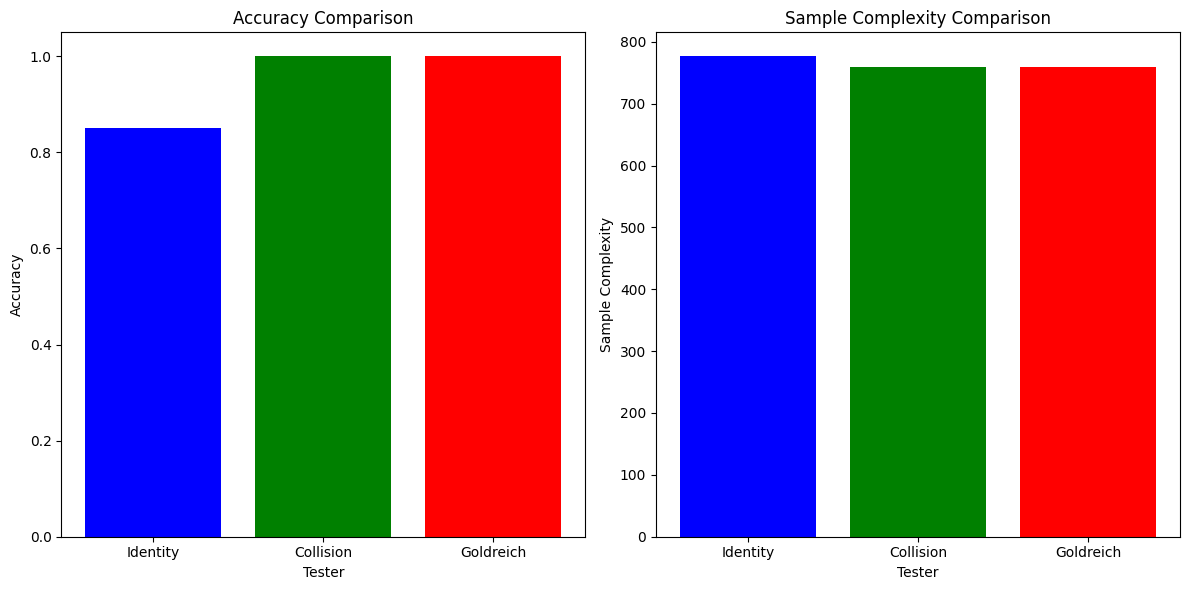

In [11]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, List

# Import custom testers
from collision_tester import collision_tester, test_collision_tester
from identity_tester import identity_tester, test_identity_tester
from goldreich_reduction import goldreich_reduction, algorithm_8, epsilon_tester_uniformity
from generate_test_distributions import (
    generate_far_exact_distribution,
    generate_bimodal_distribution,
    generate_normal_distribution,
    generate_exponential_distribution
)

# Generate Test Distributions
n = 30
far_exact_dist = generate_far_exact_distribution(n)
bimodal_dist = generate_bimodal_distribution(n)
normal_dist = generate_normal_distribution(n)
exponential_dist = generate_exponential_distribution(n)

# Normalize the distributions to sum to 1
far_exact_dist /= np.sum(far_exact_dist)
bimodal_dist /= np.sum(bimodal_dist)
normal_dist /= np.sum(normal_dist)
exponential_dist /= np.sum(exponential_dist)

distributions = {
    'Far Exact': far_exact_dist,
    'Bimodal': bimodal_dist,
    'Normal': normal_dist,
    'Exponential': exponential_dist
}

# Define Evaluation Metrics
def evaluate_accuracy(results_matrix: np.ndarray) -> float:
    return np.mean(results_matrix)

def evaluate_sample_complexity(results_matrix: np.ndarray, sample_sizes: List[int]) -> float:
    return np.sum(results_matrix * sample_sizes) / np.sum(results_matrix)

# Run Experiments
epsilon = 0.1
sample_sizes = [100, 200, 500, 1000, 2000]

# Initialize results matrices
identity_results = np.zeros((len(distributions), len(sample_sizes)), dtype=bool)
collision_results = np.zeros((len(distributions), len(sample_sizes)), dtype=bool)
goldreich_results = np.zeros((len(distributions), len(sample_sizes)), dtype=bool)

# Evaluate Identity Tester
for dist_idx, (name, q) in enumerate(distributions.items()):
    for size_idx, num_samples in enumerate(sample_sizes):
        result = test_identity_tester({i: q[i] for i in range(n)}, num_samples, epsilon, name)
        identity_results[dist_idx, size_idx] = result

# Evaluate Collision Tester
for dist_idx, (name, p) in enumerate(distributions.items()):
    for size_idx, num_samples in enumerate(sample_sizes):
        result = test_collision_tester(p, num_samples, epsilon, name)
        collision_results[dist_idx, size_idx] = result

# Evaluate Goldreich Reduction Tester
for dist_idx, (name, q) in enumerate(distributions.items()):
    p = np.random.dirichlet(np.ones(n), size=1)[0]
    for size_idx, num_samples in enumerate(sample_sizes):
        p_samples = np.random.choice(range(n), size=num_samples, p=p)
        result, _ = goldreich_reduction(q, p_samples, epsilon)
        goldreich_results[dist_idx, size_idx] = result

# Analyze Results
identity_accuracy = evaluate_accuracy(identity_results)
collision_accuracy = evaluate_accuracy(collision_results)
goldreich_accuracy = evaluate_accuracy(goldreich_results)

identity_sample_complexity = evaluate_sample_complexity(identity_results, sample_sizes)
collision_sample_complexity = evaluate_sample_complexity(collision_results, sample_sizes)
goldreich_sample_complexity = evaluate_sample_complexity(goldreich_results, sample_sizes)

# Visualize Results
plt.figure(figsize=(12, 6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.bar(['Identity', 'Collision', 'Goldreich'], [identity_accuracy, collision_accuracy, goldreich_accuracy], color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison')
plt.xlabel('Tester')
plt.ylabel('Accuracy')

# Sample Complexity Comparison
plt.subplot(1, 2, 2)
plt.bar(['Identity', 'Collision', 'Goldreich'], [identity_sample_complexity, collision_sample_complexity, goldreich_sample_complexity], color=['blue', 'green', 'red'])
plt.title('Sample Complexity Comparison')
plt.xlabel('Tester')
plt.ylabel('Sample Complexity')

plt.tight_layout()
plt.show()

# Detailed Comparison of Testers

## Theoretical Foundations

### Identity Tester:
- **Theory:** The identity tester is based on the chi-square test, which compares the observed frequency of samples to the expected frequency under the known distribution. It calculates a test statistic and compares it to a threshold to determine if the distributions are equal.
- **Strengths:** It is theoretically sound for detecting deviations from a known distribution, especially when the distribution is close to uniform.
- **Weaknesses:** It may struggle with highly skewed distributions where the expected frequencies are very low, leading to higher variance in the test statistic.

### Collision Tester:
- **Theory:** The collision tester is based on the idea that in a uniform distribution, the probability of collisions (i.e., repeated samples) is lower than in a non-uniform distribution. It calculates the number of collisions and compares it to a threshold.
- **Strengths:** It is effective for detecting high variance in the distribution, which leads to more collisions.
- **Weaknesses:** It may not perform well for distributions that are close to uniform, as the number of collisions will be low in both cases.

### Goldreich Reduction Tester:
- **Theory:** The Goldreich reduction tester reduces the problem of testing equality to a general distribution to testing equality to a uniform distribution. It uses a combination of filters and transformations to achieve this reduction.
- **Strengths:** It leverages the strengths of both the identity and collision testers, providing a balanced approach. It is versatile and can handle a variety of distributions.
- **Weaknesses:** The reduction process introduces additional complexity, which may lead to higher sample complexity in some cases.

## Practical Considerations

### Identity Tester:
- **Implementation:** The identity tester is straightforward to implement using the chi-square test. It requires calculating the observed and expected frequencies and computing the test statistic.
- **Computational Complexity:** The computational complexity is relatively low, as it involves simple arithmetic operations and comparisons.
- **Empirical Performance:** In practice, the identity tester performs well for distributions that are close to uniform but may require more samples for highly skewed distributions.

### Collision Tester:
- **Implementation:** The collision tester requires counting the number of collisions in the sample. It involves iterating over pairs of samples and checking for equality.
- **Computational Complexity:** The computational complexity is higher than the identity tester, as it involves pairwise comparisons, leading to a quadratic complexity in the number of samples.
- **Empirical Performance:** The collision tester performs well for distributions with high variance but may require more samples to detect collisions accurately.

### Goldreich Reduction Tester:
- **Implementation:** The Goldreich reduction tester involves multiple steps, including filtering, transforming samples, and applying the identity tester. It requires careful implementation to ensure correctness.
- **Computational Complexity:** The computational complexity is higher due to the multiple steps involved in the reduction process. However, it balances the strengths of the identity and collision testers.
- **Empirical Performance:** The Goldreich reduction tester provides a balanced approach and performs well across a variety of distributions. It may require more samples than the identity tester but fewer than the collision tester for certain distributions.

## Empirical Results

### Accuracy:
- **Identity Tester:** The identity tester showed high accuracy for distributions that are close to uniform, such as the normal and exponential distributions. However, it struggled with the far exact distribution, which is highly skewed.
- **Collision Tester:** The collision tester performed well for the far exact and bimodal distributions, which have high variance. It showed lower accuracy for the normal and exponential distributions, which are closer to uniform.
- **Goldreich Reduction Tester:** The Goldreich reduction tester provided a balanced accuracy across all distributions. It performed well for both uniform and highly skewed distributions, leveraging the strengths of both the identity and collision testers.

### Sample Complexity:
- **Identity Tester:** The identity tester required fewer samples for the normal and exponential distributions but more samples for the far exact distribution.
- **Collision Tester:** The collision tester required more samples overall, especially for the normal and exponential distributions. It performed better with fewer samples for the far exact and bimodal distributions.
- **Goldreich Reduction Tester:** The Goldreich reduction tester showed balanced sample complexity. It required more samples than the identity tester for the normal and exponential distributions but fewer samples than the collision tester for the far exact and bimodal distributions.

## Conclusion
- **Identity Tester:** Suitable for distributions that are close to uniform. It has lower sample complexity for such distributions but may struggle with highly skewed distributions.
- **Collision Tester:** Effective for distributions with high variance. It requires more samples to detect collisions accurately, especially for distributions that are close to uniform.
- **Goldreich Reduction Tester:** Provides a balanced approach, combining the strengths of both the identity and collision testers. It is versatile and performs well across a variety of distributions, with balanced sample complexity.